In [89]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [90]:
# Load dataset
df = pd.read_csv("quikr_car.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [91]:
df.shape

(892, 6)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [93]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [94]:
df["Price"].nunique()

274

In [95]:
df["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [96]:
# Clean 'Price' column (remove commas, convert to numeric, handle 'Ask For Price')
df['Price'] = df['Price'].str.replace(',','').str.replace('Ask For Price','NaN')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [97]:

# Clean 'kms_driven' column (remove 'kms', commas, convert to numeric)
df['kms_driven'] = df['kms_driven'].str.replace('kms','').str.replace(',','')
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')


In [98]:
# Drop rows with missing target values
df = df.dropna(subset=['Price'])


In [99]:
# Handle missing values in features
df['kms_driven'].fillna(df['kms_driven'].median(), inplace=True)
df['fuel_type'].fillna('Unknown', inplace=True)

In [100]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel


In [101]:
# Extract car brand from 'name'
df['brand'] = df['name'].str.split().str[0]


In [102]:
# Convert 'year' column to numeric (handle errors)
# Drop rows where year is missing or invalid
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df = df.dropna(subset=['year'])

# Calculate car age
df['car_age'] = 2026 - df['year']


In [103]:
# Drop irrelevant columns
df = df.drop(['name'], axis=1)

In [104]:
# Drop rows with missing values in features
df = df.dropna(subset=['year','kms_driven','car_age','company','fuel_type','brand','Price'])


In [105]:
df.head()

,company,year,Price,kms_driven,fuel_type,brand,car_age
0,Hyundai,2007.0,80000.0,45000.0,Petrol,Hyundai,19.0
1,Mahindra,2006.0,425000.0,40.0,Diesel,Mahindra,20.0
3,Hyundai,2014.0,325000.0,28000.0,Petrol,Hyundai,12.0
4,Ford,2014.0,575000.0,36000.0,Diesel,Ford,12.0
6,Ford,2012.0,175000.0,41000.0,Diesel,Ford,14.0


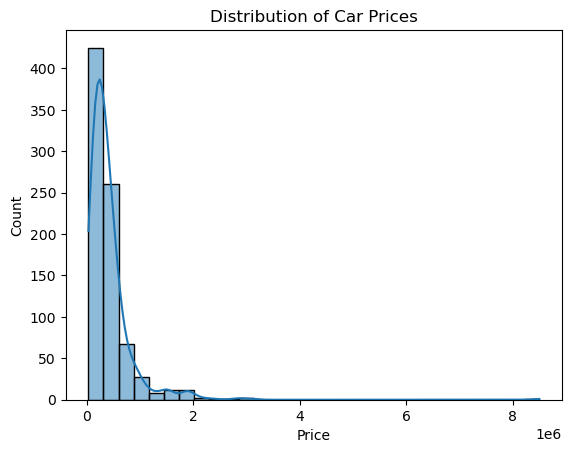

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.show()


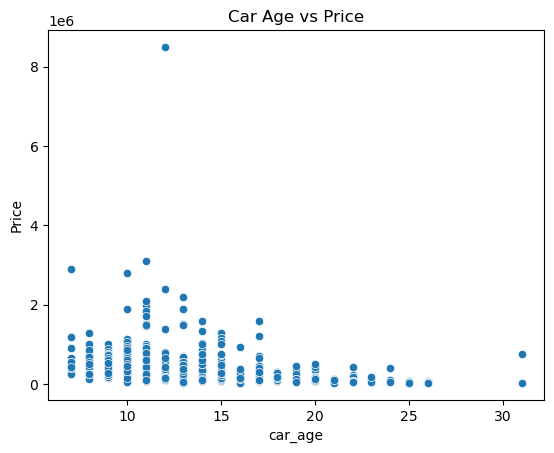

In [107]:
# Price vs Age
sns.scatterplot(x='car_age', y='Price', data=df)
plt.title("Car Age vs Price")
plt.show()


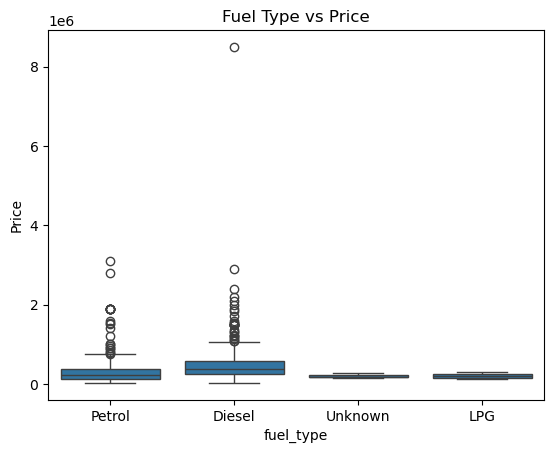

In [108]:
# Price by Fuel Type
sns.boxplot(x='fuel_type', y='Price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

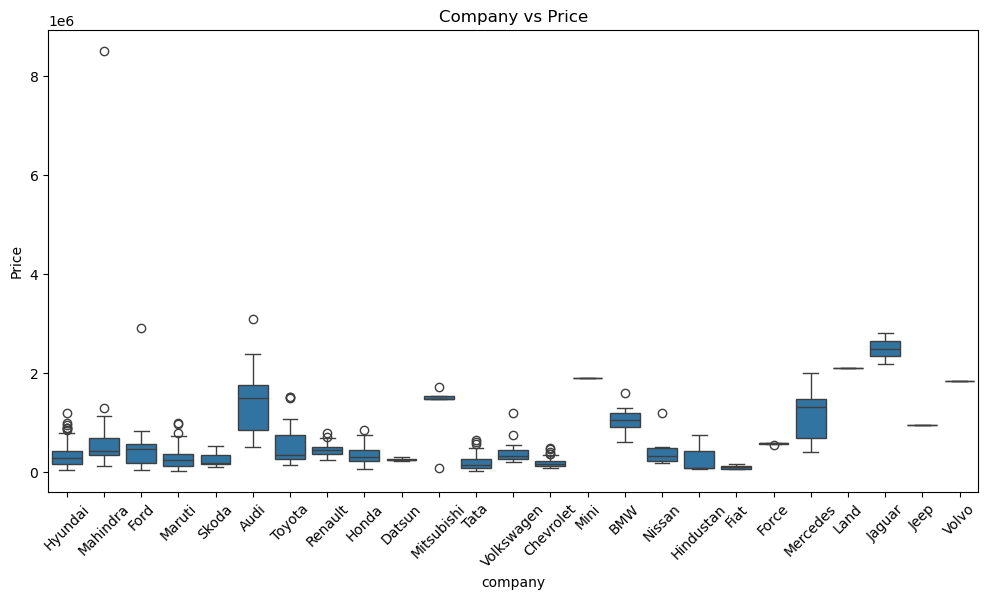

In [109]:

# Price by Company
plt.figure(figsize=(12,6))
sns.boxplot(x='company', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Company vs Price")
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [111]:

# Features & target
X = df.drop('Price', axis=1)
y = df['Price']

In [112]:
# Categorical & numerical columns
cat_cols = ['company','fuel_type','brand']
num_cols = ['year','kms_driven','car_age']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

In [113]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [114]:
# Regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [115]:
# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'kms_driven',
                                                   'car_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['company', 'fuel_type',
                                                   'brand'])])),
                ('regressor', LinearRegression())])

In [116]:
# Evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7388905972702411
RMSE: 207111.37418952514


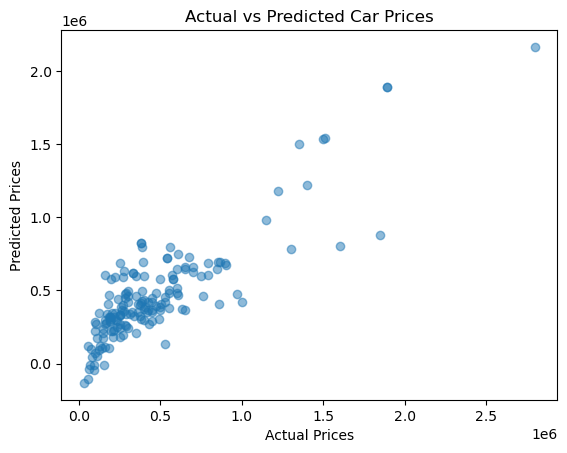

In [117]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()
